# Assignment 3 - More Pandas


### Question 1 
Load the energy data from the file `Energy Indicators.xls`, which is a list of indicators of [energy supply and renewable electricity production](Energy%20Indicators.xls) from the [United Nations](http://unstats.un.org/unsd/environment/excel_file_tables/2013/Energy%20Indicators.xls) for the year 2013, and should be put into a DataFrame with the variable name of **energy**.

Keep in mind that this is an Excel file, and not a comma separated values file. Also, make sure to exclude the footer and header information from the datafile. The first two columns are unneccessary, so you should get rid of them, and you should change the column labels so that the columns are:

`['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']`

Convert `Energy Supply` to gigajoules (there are 1,000,000 gigajoules in a petajoule). For all countries which have missing data (e.g. data with "...") make sure this is reflected as `np.NaN` values.

Rename the following list of countries (for use in later questions):

```"Republic of Korea": "South Korea",
"United States of America": "United States",
"United Kingdom of Great Britain and Northern Ireland": "United Kingdom",
"China, Hong Kong Special Administrative Region": "Hong Kong"```

There are also several countries with numbers and/or parenthesis in their name. Be sure to remove these, 

e.g. 

`'Bolivia (Plurinational State of)'` should be `'Bolivia'`, 

`'Switzerland17'` should be `'Switzerland'`.

<br>

Next, load the GDP data from the file `world_bank.csv`, which is a csv containing countries' GDP from 1960 to 2015 from [World Bank](http://data.worldbank.org/indicator/NY.GDP.MKTP.CD). Call this DataFrame **GDP**. 

Make sure to skip the header, and rename the following list of countries:

```"Korea, Rep.": "South Korea", 
"Iran, Islamic Rep.": "Iran",
"Hong Kong SAR, China": "Hong Kong"```

<br>

Finally, load the [Sciamgo Journal and Country Rank data for Energy Engineering and Power Technology](http://www.scimagojr.com/countryrank.php?category=2102) from the file `scimagojr-3.xlsx`, which ranks countries based on their journal contributions in the aforementioned area. Call this DataFrame **ScimEn**.

Join the three datasets: GDP, Energy, and ScimEn into a new dataset (using the intersection of country names). Use only the last 10 years (2006-2015) of GDP data and only the top 15 countries by Scimagojr 'Rank' (Rank 1 through 15). 

The index of this DataFrame should be the name of the country, and the columns should be ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations',
       'Citations per document', 'H index', 'Energy Supply',
       'Energy Supply per Capita', '% Renewable', '2006', '2007', '2008',
       '2009', '2010', '2011', '2012', '2013', '2014', '2015'].

*This function should return a DataFrame with 20 columns and 15 entries.*

In [1]:
!pip install xlrd

import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
import numpy as np 

In [2]:
    # Part 1: Energy Data

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

energy = pd.read_excel('Energy Indicators.xls')

        # initial data cleaning

energy = energy.iloc[:-38]
energy = energy.iloc[1:]
energy.drop(['Unnamed: 0', 'Unnamed: 1'], axis = 1, inplace = True)
energy.rename(columns={'Unnamed: 2':'Country', 'Renewable Electricity Production':'% Renewable'}, inplace = True)
energy['Energy Supply'] = energy['Energy Supply'] * 1000000

        # dealing with missing values

energy['Energy Supply'] = pd.to_numeric(energy['Energy Supply'], errors='coerce')
energy['Energy Supply per capita'] = pd.to_numeric(energy['Energy Supply per capita'], errors='coerce')
energy.head()

        # cleaning Country name: deleting the numbers from the alphabest

energy['Country'] = energy['Country'].str.replace('\d+', '')
energy.head()

        # correcting country names

energy.Country[energy.Country == "Republic of Korea"] = "South Korea"
energy.Country[energy.Country == "United States of America"] = "United States"
energy.Country[energy.Country == "United Kingdom of Great Britain and Northern Ireland"] = "United Kingdom"
energy.Country[energy.Country == "China, Hong Kong Special Administrative Region"] = "Hong Kong"

         # Deleting the '()' arts from the country names

energy['Country'] = energy['Country'].str.split('(', expand=True, n=1)
energy['Country'] = energy['Country'].str.strip()
energy.set_index('Country', inplace = True)

        # Part 2: GDP Data

GDP = pd.read_csv('world_bank.csv', skiprows = lambda x: x in [0, 2], header = 2)
GDP =  GDP.rename(columns={'Country Name': 'Country'})

        # correcting country names

GDP.Country[GDP.Country == "Korea, Rep."] = "South Korea"
GDP.Country[GDP.Country == "Iran, Islamic Rep."] = "Iran"
GDP.Country[GDP.Country == "Hong Kong SAR, China"] = "Hong Kong"

        # pereprocessing for merging

cols_to_keep = ['Country','2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
GDP = GDP[cols_to_keep]
GDP.set_index('Country', inplace = True)

        # Part 3: ScimEn Data

ScimEn = pd.read_excel('scimagojr-3.xlsx')
ScimEn_rank = ScimEn.iloc[:15]
ScimEn_rank.set_index('Country', inplace = True)


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/jupyterlab/conda/envs/python/lib/pyth

In [3]:
def answer_one():
    
    m1 = pd.merge(ScimEn_rank, energy, how='inner', left_index=True, right_index=True)
    m2 = pd.merge(m1, GDP, how='inner', left_index=True, right_index=True)
    return m2

answer_one()

Rank  Documents  Citable documents  Citations  \
Country                                                             
China                  1     127050             126767     597237   
United States          2      96661              94747     792274   
Japan                  3      30504              30287     223024   
United Kingdom         4      20944              20357     206091   
Russian Federation     5      18534              18301      34266   
Canada                 6      17899              17620     215003   
Germany                7      17027              16831     140566   
India                  8      15005              14841     128763   
France                 9      13153              12973     130632   
South Korea           10      11983              11923     114675   
Italy                 11      10964              10794     111850   
Spain                 12       9428               9330     123336   
Iran                  13       8896               8819      57470   
Australia             14       8831               8725      90765   
Brazil                15       8668               8596      60702   

                    Self-citations  Citations per document  H index  \
Country                                                               
China                       411683                    4.70      138   
United States               265436                    8.20      230   
Japan                        61554                    7.31      134   
United Kingdom               37874                    9.84      139   
Russian Federation           12422                    1.85       57   
Canada                       40930                   12.01      149   
Germany                      27426                    8.26      126   
India                        37209                    8.58      115   
France                       28601                    9.93      114   
South Korea                  22595                    9.57      104   
Italy                        26661                   10.20      106   
Spain                        23964                   13.08      115   
Iran                         19125                    6.46       72   
Australia                    15606                   10.28      107   
Brazil                       14396                    7.00       86   

                    Energy Supply  Energy Supply per capita % Renewable  \
Country                                                                   
China                1.271910e+11                      93.0     19.7549   
United States        9.083800e+10                     286.0      11.571   
Japan                1.898400e+10                     149.0     10.2328   
United Kingdom       7.920000e+09                     124.0     10.6005   
Russian Federation   3.070900e+10                     214.0     17.2887   
Canada               1.043100e+10                     296.0     61.9454   
Germany              1.326100e+10                     165.0     17.9015   
India                3.319500e+10                      26.0     14.9691   
France               1.059700e+10                     166.0     17.0203   
South Korea          1.100700e+10                     221.0     2.27935   
Italy                6.530000e+09                     109.0     33.6672   
Spain                4.923000e+09                     106.0     37.9686   
Iran                 9.172000e+09                     119.0     5.70772   
Australia            5.386000e+09                     231.0     11.8108   
Brazil               1.214900e+10                      59.0      69.648   

                            2006          2007          2008          2009  \
Country                                                                      
China               3.992331e+12  4.559041e+12  4.997775e+12  5.459247e+12   
United States       1.479230e+13  1.505540e+13  1.501149e+13  1.459484e+13   
Japan               5.496542e+12  5.617036e+12  5.

### Question 2 
The previous question joined three datasets then reduced this to just the top 15 entries. When you joined the datasets, but before you reduced this to the top 15 items, how many entries did you lose?

*This function should return a single number.*

In [4]:
%%HTML
<svg width="800" height="300">
  <circle cx="150" cy="180" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="blue" />
  <circle cx="200" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="red" />
  <circle cx="100" cy="100" r="80" fill-opacity="0.2" stroke="black" stroke-width="2" fill="green" />
  <line x1="150" y1="125" x2="300" y2="150" stroke="black" stroke-width="2" fill="black" stroke-dasharray="5,3"/>
  <text  x="300" y="165" font-family="Verdana" font-size="35">Everything but this!</text>
</svg>

In [5]:
def answer_two():
    
    merge1 = pd.merge(energy, GDP, how="inner", left_index=True, right_index=True)
    merge2 = pd.merge(energy, ScimEn, how="inner", left_index=True, right_index=True)
    merge3 = pd.merge(GDP, ScimEn, how="inner", left_index=True, right_index=True)
    act = pd.merge(merge1, ScimEn, how="inner", left_index=True, right_index=True)
    size_energy = len(energy.index)
    size_GDP = len(GDP.index)
    size_ScimEn = len(ScimEn.index)
    m1 = len(merge1.index)
    m2 = len(merge2.index)
    m3 = len(merge3.index)
    all3 = len(act.index)
    ans = size_energy + size_GDP +  size_ScimEn - m1 - m2 - m3 + all3
    
    return ans

answer_two()

496

## Answer the following questions in the context of only the top 15 countries by Scimagojr Rank (aka the DataFrame returned by `answer_one()`)

### Question 3 
What is the average GDP over the last 10 years for each country? (exclude missing values from this calculation.)

*This function should return a Series named `avgGDP` with 15 countries and their average GDP sorted in descending order.*

In [6]:
def answer_three():
    
    Top15 = answer_one()
    Top15.dropna(axis=1, how='any')
    data =['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    
    Top15['avg'] = Top15[data].mean(axis = 1)
    avgGDP = Top15['avg'].sort_values(ascending = False)

    return avgGDP

answer_three()

Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avg, dtype: float64

### Question 4 
By how much had the GDP changed over the 10 year span for the country with the 6th largest average GDP?

*This function should return a single number.*

In [7]:
def answer_four():
    
    Top15 = answer_one()
    avgGDP = answer_three().copy()
    data =['2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
    CountryName = avgGDP.index[5]

    UK_data = Top15.loc[:, data]
    change = abs(UK_data.loc[CountryName].max() - UK_data.loc[CountryName].min())
    return change

answer_four()

299285784765.13965

### Question 5 
What is the mean `Energy Supply per Capita`?

*This function should return a single number.*

In [8]:
def answer_five():
    Top15 = answer_one()
    Top15.dropna(axis=1, how='any')

    a = Top15[['Energy Supply per capita']]
    return a.mean(axis = 0)[0]

answer_five()

157.6

### Question 6 
What country has the maximum % Renewable and what is the percentage?

*This function should return a tuple with the name of the country and the percentage.*

In [9]:
def answer_six():
    
    Top15 = answer_one()
    RE = Top15['% Renewable'].sort_values(ascending = False).index[0], Top15['% Renewable'].sort_values(ascending = False)[0]

    return RE

answer_six()

('Brazil', 69.64803)

### Question 7
Create a new column that is the ratio of Self-Citations to Total Citations. 
What is the maximum value for this new column, and what country has the highest ratio?

*This function should return a tuple with the name of the country and the ratio.*

In [10]:
def answer_seven():
    
    Top15 = answer_one()
    Top15['Citation Ratio'] = Top15['Self-citations']/ Top15['Citations']
    Citation = Top15['Citation Ratio'].sort_values(ascending = False).index[0], Top15['Citation Ratio'].sort_values(ascending = False)[0]
    return Citation

answer_seven()

('China', 0.6893126179389422)

### Question 8 

Create a column that estimates the population using Energy Supply and Energy Supply per capita. 
What is the third most populous country according to this estimate?

*This function should return a single string value.*

In [11]:
def answer_eight():
    
    Top15 = answer_one()
    Top15['Energy Estimate'] = Top15['Energy Supply']/ Top15['Energy Supply per capita']
    Energy = Top15['Energy Estimate'].sort_values(ascending = False).index[2], Top15['Energy Estimate'].sort_values(ascending = False)[2]
    return Energy

answer_eight()

('United States', 317615384.61538464)

### Question 9
Create a column that estimates the number of citable documents per person. 
What is the correlation between the number of citable documents per capita and the energy supply per capita? Use the `.corr()` method, (Pearson's correlation).

*This function should return a single number.*

*(Optional: Use the built-in function `plot9()` to visualize the relationship between Energy Supply per Capita vs. Citable docs per Capita)*

In [12]:
def answer_nine():
    Top15 = answer_one()
    Top15['Pop'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15['Citable documents per capita'] = Top15['Citable documents'] / Top15['Pop']
    cor = Top15[['Citable documents per capita', 'Energy Supply per capita']].corr(method='pearson')
    cor.loc['Energy Supply per capita', 'Citable documents per capita']
    return cor.loc['Energy Supply per capita', 'Citable documents per capita']

answer_nine()

0.7940010435442943

In [15]:
def plot9():
    import matplotlib as plt
    %matplotlib inline
    
    Top15 = answer_one()
    Top15['PopEst'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15['Citable documents per capita'] = Top15['Citable documents'] / Top15['PopEst']
    Top15.plot(x='Citable documents per capita', y='Energy Supply per capita', kind='scatter', xlim=[0, 0.0006])

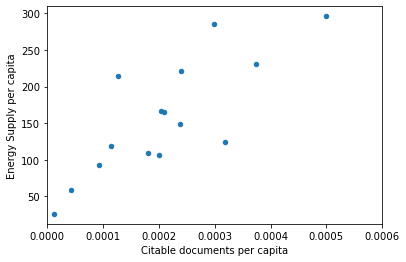

In [16]:
plot9() 

### Question 10 
Create a new column with a 1 if the country's % Renewable value is at or above the median for all countries in the top 15, and a 0 if the country's % Renewable value is below the median.

*This function should return a series named `HighRenew` whose index is the country name sorted in ascending order of rank.*

In [17]:
def answer_ten():
    
    Top15 = answer_one()
    med = Top15['% Renewable'].median()

    for i in range(len(Top15)):
        if Top15.iloc[i]['% Renewable'] >= med :
            Top15.set_value(Top15.iloc[i].name, 'HighRenew', 1)
        else:
            Top15.set_value(Top15.iloc[i].name, 'HighRenew', 0)

    Top15['HighRenew'] = Top15['HighRenew'].astype(int)
    return Top15['HighRenew']

answer_ten()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  # Remove the CWD from sys.path while we load stuff.


Country
China                 1
United States         0
Japan                 0
United Kingdom        0
Russian Federation    1
Canada                1
Germany               1
India                 0
France                1
South Korea           0
Italy                 1
Spain                 1
Iran                  0
Australia             0
Brazil                1
Name: HighRenew, dtype: int64

### Question 11 
Use the following dictionary to group the Countries by Continent, then create a dateframe that displays the sample size (the number of countries in each continent bin), and the sum, mean, and std deviation for the estimated population of each country.

```python
ContinentDict  = {'China':'Asia', 
                  'United States':'North America', 
                  'Japan':'Asia', 
                  'United Kingdom':'Europe', 
                  'Russian Federation':'Europe', 
                  'Canada':'North America', 
                  'Germany':'Europe', 
                  'India':'Asia',
                  'France':'Europe', 
                  'South Korea':'Asia', 
                  'Italy':'Europe', 
                  'Spain':'Europe', 
                  'Iran':'Asia',
                  'Australia':'Australia', 
                  'Brazil':'South America'}
```

*This function should return a DataFrame with index named Continent `['Asia', 'Australia', 'Europe', 'North America', 'South America']` and columns `['size', 'sum', 'mean', 'std']`*

In [18]:
def answer_eleven():
    
    Top15 = answer_one()

    Top15['Continent'] = Top15.index
    Top15['Continent'].replace({'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'},inplace=True)

    Top15['Pop'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15_grp = Top15[['Continent','Pop']]
    Top15_grp = Top15_grp.dropna(axis=1, how='any')
    Top15_grp.reset_index(level=0).set_index(['Continent', 'Country'])
    ans = Top15_grp.set_index('Continent').groupby(level=0)['Pop'].agg({'size': np.size, 'sum': np.sum, 'avg': np.average, 'std': np.std})
    
    return ans

answer_eleven()

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:26: FutureWarning: using a dict on a Series for aggregation
is deprecated and will be removed in a future version. Use                 named aggregation instead.

    >>> grouper.agg(name_1=func_1, name_2=func_2)



size           sum           avg           std
Continent                                                    
Asia            5.0  2.898666e+09  5.797333e+08  6.790979e+08
Australia       1.0  2.331602e+07  2.331602e+07           NaN
Europe          6.0  4.579297e+08  7.632161e+07  3.464767e+07
North America   2.0  3.528552e+08  1.764276e+08  1.996696e+08
South America   1.0  2.059153e+08  2.059153e+08           NaN

### Question 12 
Cut % Renewable into 5 bins. Group Top15 by the Continent, as well as these new % Renewable bins. How many countries are in each of these groups?

*This function should return a __Series__ with a MultiIndex of `Continent`, then the bins for `% Renewable`. Do not include groups with no countries.*

In [19]:
def answer_twelve():
    Top15 = answer_one()
    Top15['Continent'] = Top15.index
    Top15['Continent'].replace({'China':'Asia', 
                      'United States':'North America', 
                      'Japan':'Asia', 
                      'United Kingdom':'Europe', 
                      'Russian Federation':'Europe', 
                      'Canada':'North America', 
                      'Germany':'Europe', 
                      'India':'Asia',
                      'France':'Europe', 
                      'South Korea':'Asia', 
                      'Italy':'Europe', 
                      'Spain':'Europe', 
                      'Iran':'Asia',
                      'Australia':'Australia', 
                      'Brazil':'South America'},inplace=True)
    
    Top15 = (Top15.reset_index(level=0).set_index(['Continent', 'Country']))
    Top15 = pd.cut(Top15['% Renewable'], 5)
    Top15 = (Top15.reset_index().set_index(['Continent', '% Renewable']))
    Top15 = Top15.groupby(level=['Continent', '% Renewable']).size()

    return Top15
    
answer_twelve()

Continent      % Renewable     
Asia           (2.212, 15.753]     4
               (15.753, 29.227]    1
Australia      (2.212, 15.753]     1
Europe         (2.212, 15.753]     1
               (15.753, 29.227]    3
               (29.227, 42.701]    2
North America  (2.212, 15.753]     1
               (56.174, 69.648]    1
South America  (56.174, 69.648]    1
dtype: int64

### Question 13 
Convert the Population Estimate series to a string with thousands separator (using commas). Do not round the results.

e.g. 317615384.61538464 -> 317,615,384.61538464

*This function should return a Series `PopEst` whose index is the country name and whose values are the population estimate string.*

In [20]:
def answer_thirteen():
    
    Top15 = answer_one()
    Top15['Pop'] = Top15['Energy Supply'] / Top15['Energy Supply per capita']
    Top15 = Top15['Pop']
    
    for i in range(len(Top15)):
        country = Top15.keys()[i]
        number = "{:,}".format((Top15.iloc[i]))
        Top15.replace(Top15.iloc[i], number, inplace=True)
        
    return Top15

answer_thirteen()

Country
China                 1,367,645,161.2903225
United States          317,615,384.61538464
Japan                  127,409,395.97315437
United Kingdom         63,870,967.741935484
Russian Federation            143,500,000.0
Canada                  35,239,864.86486486
Germany                 80,369,696.96969697
India                 1,276,730,769.2307692
France                  63,837,349.39759036
South Korea            49,805,429.864253394
Italy                  59,908,256.880733944
Spain                    46,443,396.2264151
Iran                    77,075,630.25210084
Australia              23,316,017.316017315
Brazil                 205,915,254.23728815
Name: Pop, dtype: object

### Visualization

Use the built in function `plot_optional()` to see an example visualization.

In [21]:
def plot_optional():
    import matplotlib as plt
    %matplotlib inline
    Top15 = answer_one()
    Top15['% Renewable'] = Top15['% Renewable'].astype(float)
    
    ax = Top15.plot(x='Rank', y='% Renewable', kind='scatter', 
                    c=['#e41a1c','#377eb8','#e41a1c','#4daf4a','#4daf4a','#377eb8','#4daf4a','#e41a1c',
                       '#4daf4a','#e41a1c','#4daf4a','#4daf4a','#e41a1c','#dede00','#ff7f00'], 
                    xticks=range(1,16), s=6*Top15['2014']/10**10, alpha=.75, figsize=[16,6]);

    for i, txt in enumerate(Top15.index):
        ax.annotate(txt, [Top15['Rank'][i], Top15['% Renewable'][i]], ha='center')

    print("This is an example of a visualization that can be created to help understand the data. \
This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' \
2014 GDP, and the color corresponds to the continent.")

This is an example of a visualization that can be created to help understand the data. This is a bubble chart showing % Renewable vs. Rank. The size of the bubble corresponds to the countries' 2014 GDP, and the color corresponds to the continent.


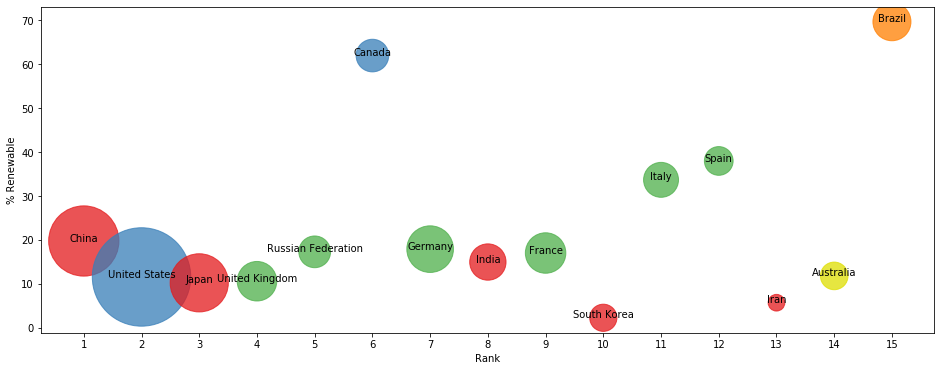

In [22]:
plot_optional()